<a href="https://colab.research.google.com/github/AndrehAguiar/POS-Graduacao-Inteligecia_Artificial-Ciencia_de_Dados/blob/master/ALURA_QuarentenaDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1: Python, Pandas e Colab

In [1]:
#@title Importa a biblioteca Matplotlib, Pandas e Seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#@title Lê o dataset(CSV) dos filmes.

df_filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')
df_filmes.columns = ['filmeId', 'Titulo', 'Generos']
df_filmes.head()

,filmeId,Titulo,Generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df_filmes.info(), df_filmes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   filmeId  9742 non-null   int64 
 1   Titulo   9742 non-null   object
 2   Generos  9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


(None,              filmeId
 count    9742.000000
 mean    42200.353623
 std     52160.494854
 min         1.000000
 25%      3248.250000
 50%      7300.000000
 75%     76232.000000
 max    193609.000000)

In [4]:
#@title Lê o dataset(CSV) de avaliações dos filmes.
df_notas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv')
df_notas.columns = ['usuarioId', 'filmeId', 'Avaliacao', 'Momento']
df_notas.head()

,usuarioId,filmeId,Avaliacao,Momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
df_notas.info(), df_notas.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   usuarioId  100836 non-null  int64  
 1   filmeId    100836 non-null  int64  
 2   Avaliacao  100836 non-null  float64
 3   Momento    100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


(None,            usuarioId        filmeId      Avaliacao       Momento
 count  100836.000000  100836.000000  100836.000000  1.008360e+05
 mean      326.127564   19435.295718       3.501557  1.205946e+09
 std       182.618491   35530.987199       1.042529  2.162610e+08
 min         1.000000       1.000000       0.500000  8.281246e+08
 25%       177.000000    1199.000000       3.000000  1.019124e+09
 50%       325.000000    2991.000000       3.500000  1.186087e+09
 75%       477.000000    8122.000000       4.000000  1.435994e+09
 max       610.000000  193609.000000       5.000000  1.537799e+09)

In [6]:
#@title Cria a coluna de avaliações e exibe pelo valor da avaliação em ordem decrescente.
media_notas_filmes = df_notas.groupby('filmeId')['Avaliacao'].mean()
df_filmes_notas_media = df_filmes.join(media_notas_filmes, on='filmeId')
df_filmes_notas_media.sort_values('Avaliacao', ascending=False)

,filmeId,Titulo,Generos,Avaliacao
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


### Desafio 1: [Paulo Silveira](https://twitter.com/paulo_caelum)
Encontrar os filmes não avaliados. 

In [7]:
#@title Exibe os filmes sem avaliação.
df_filmes_notas_media[pd.isna(df_filmes_notas_media['Avaliacao'])]

,filmeId,Titulo,Generos,Avaliacao
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


## Desafio 2: [Guilherme Silveira](https://twitter.com/guilhermecaelum)
Renomear a coluna 'rating' do DataFrame gerado com as médias para 'Notas Médias'.

In [8]:
#@title Renomeia as colunas.
df_filmes_notas_media.columns = ['filmeId', 'Titulo', 'Genero', 'AvaliacaoMedia']
df_filmes_notas_media.head()

,filmeId,Titulo,Genero,AvaliacaoMedia
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


## Desafio 3: [Guilherme Silveira](https://twitter.com/guilhermecaelum)
Criar uma coluna com a quantidade de avaliações de cada filme. 

In [9]:
#@title Conta e cria a coluna com a quantidade de avaliações de cada filme.
qtd_avaliacao_filme = df_notas.groupby('filmeId')['Avaliacao'].count()
df_filmes_notas_media = df_filmes_notas_media.join(qtd_avaliacao_filme, on='filmeId')
df_filmes_notas_media.head()

,filmeId,Titulo,Genero,AvaliacaoMedia,Avaliacao
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


## Desafio 4: [Thiago Gonçalves](https://twitter.com/tgcsantos)
Arredondar avaliações para 2 decimais.

In [10]:
#@title Arredonda a média das avaliações para 2 decimais.
df_filmes_notas_media.columns = ['filmeId', 'Titulo', 'Genero', 'AvaliacaoMedia', 'Qtd_avaliacoes']
df_filmes_notas_media['AvaliacaoMedia'] = df_filmes_notas_media['AvaliacaoMedia'].round(2)
df_filmes_notas_media.head(10)

,filmeId,Titulo,Genero,AvaliacaoMedia,Qtd_avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0
5,6,Heat (1995),Action|Crime|Thriller,3.95,102.0
6,7,Sabrina (1995),Comedy|Romance,3.19,54.0
7,8,Tom and Huck (1995),Adventure|Children,2.88,8.0
8,9,Sudden Death (1995),Action,3.12,16.0
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.50,132.0


### Desafio 5: [Allan Spadini](https://twitter.com/allanspadini)
 Descobrir os gêneros únicos (Quais são eles?).

In [11]:
#@title A lista de 19 gêneros base que compõem a classificação do dataset
grp_filmes_genero = df_filmes_notas_media.groupby('Genero').nunique()
lst_generos = []
for gen in grp_filmes_genero.index:
  genero = gen.split('|')
  for g in list(genero):
    lst_generos.append(g) if g not in list(lst_generos) else ''

print(*lst_generos, sep='\n')

(no genres listed)
Action
Adventure
Animation
Children
Comedy
Fantasy
IMAX
Romance
Sci-Fi
Western
Crime
Mystery
Thriller
Drama
Horror
Film-Noir
Documentary
War
Musical


### Desafio 6: [Thais André](https://twitter.com/thais_tandre)
Contar a quantidade de filmes agrupados por gênero.

In [12]:
#@title Contagem de títulos por classificação composta.
df_grp_generos = df_filmes_notas_media.groupby('Genero').count().drop(['filmeId', 'AvaliacaoMedia','Qtd_avaliacoes'], axis=1, inplace=False)
df_grp_generos.head()

,Titulo
Genero,
(no genres listed),34
Action,60
Action|Adventure,32
Action|Adventure|Animation,18
Action|Adventure|Animation|Children,6


### Desafio 7: [Guilherme Silveira](https://twitter.com/guilhermecaelum)
Plotar a distribuição de filmes por gênero. 

In [13]:
#@title Solução Alura desafio 6
df_filmes['Generos'].str.get_dummies('|').sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

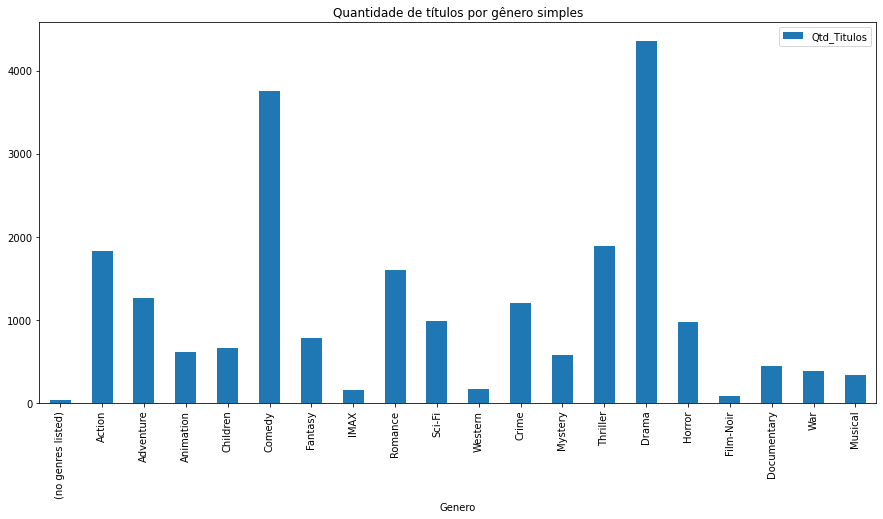

In [14]:
#@title Pelo fato de serem mais de 900 gêneros compostos, o gráfico abaixo contém a contagem de ocorrências dos gêneros simples na classificação composta do dataset. Sendo assim, um único título pode ter sido contabilizado várias vezes.
df_freq_generos = pd.DataFrame(columns=['Genero', 'Qtd_Titulos'])

for i, gen in enumerate(lst_generos):
  freq_gen = 0
  for row, genero in df_grp_generos.iterrows():
    if gen in row:
      freq_gen += genero['Titulo']
  df_freq_generos.loc[i, 'Genero'] = gen
  df_freq_generos.loc[i,'Qtd_Titulos'] = freq_gen

df_freq_generos.plot('Genero','Qtd_Titulos', kind='bar', figsize=(15,7), title='Quantidade de títulos por gênero simples')

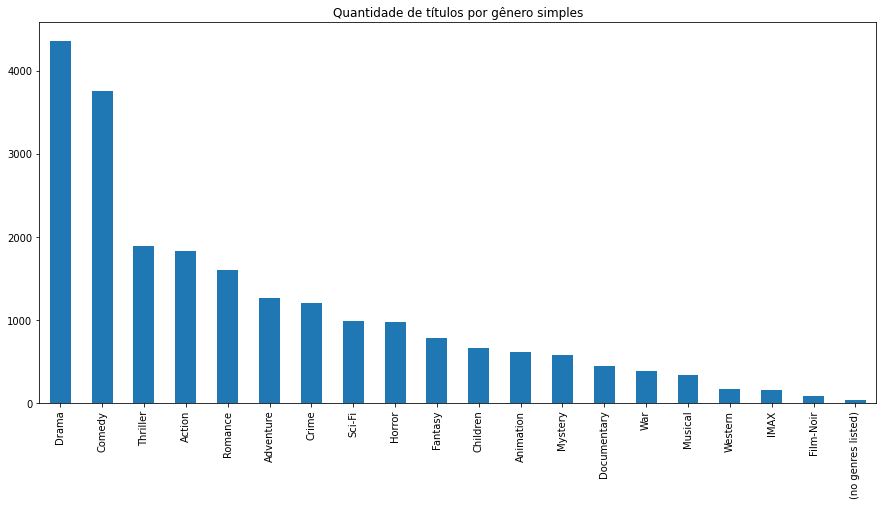

In [15]:
#@title Solução Alura desafio 7
df_filmes['Generos'].str.get_dummies('|').sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,7), title='Quantidade de títulos por gênero simples')

# Aula 2: Médias, medianas e visualização de dados.

### Desafio 1: [Guilherme Silveira](https://twitter.com/guilhermecaelum/)
Rotacionar os thicks (nome dos gêneros) 

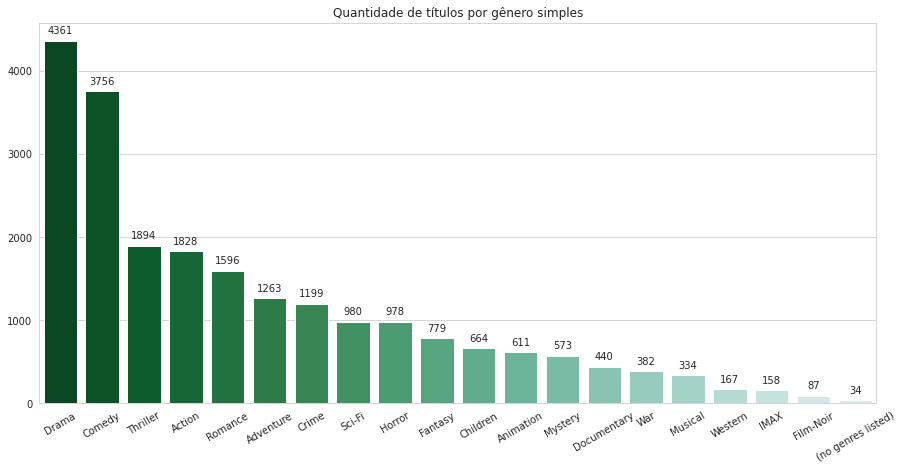

In [16]:
#@title Plota o gráfico de frequência de gêneros ordenas pela quantidade de ocorrências.
sns.set_style('whitegrid')
dados = df_filmes['Generos'].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(15,7))
plt.xticks(rotation=30)
plt.title('Quantidade de títulos por gênero simples')
g = sns.barplot(x=dados.index,
            y=dados.values,
            palette=sns.color_palette('BuGn_r', n_colors=len(dados) + 4))
for p in g.patches:
  g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

### Desafio 2: [Paulo Silveira](https://twitter.com/paulo_caelum)
Comparar outros filmes com notas próximas e achar distribuições bem diferentes.

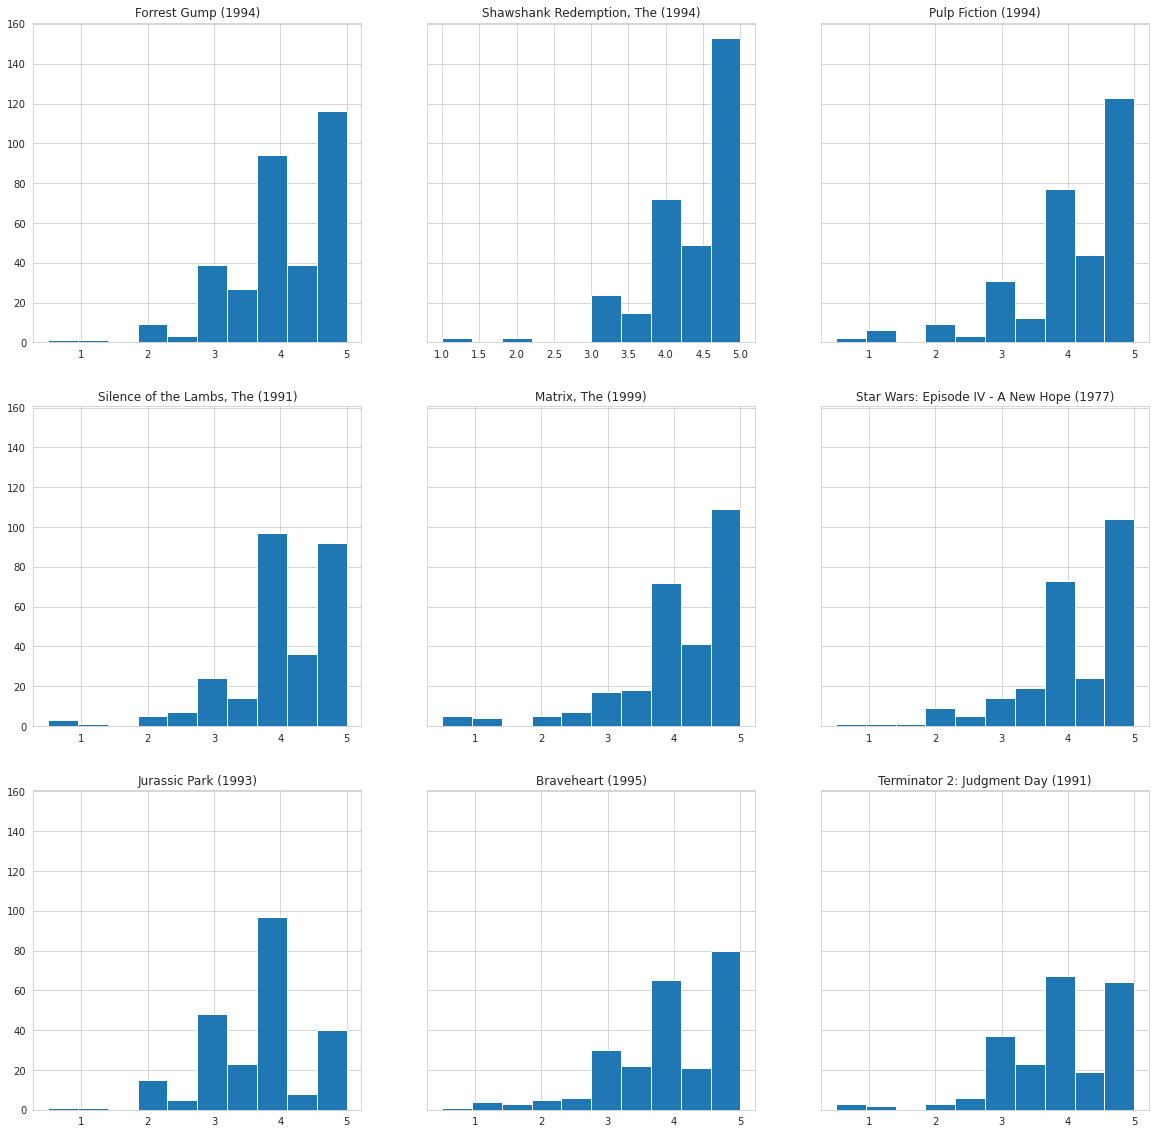

In [17]:
#@title Plota os histogramas dos 9 filmes mais avaliados.<br>Comparando os gráficos, pode-se conluir que o 'Shawshank Redemption, The (1994)', apesar de ser o 2º mais votado, possui a maior quantidade de notas 5 e menos notas abaixo de 3 confirmando a média de avaliações.
df_mais_votados = df_filmes_notas_media.sort_values('Qtd_avaliacoes', ascending=False).head(10)
plt.xlim=(0,5)
fig, axs = plt.subplots(3,3, sharey=True)
fig.set_figheight(20)
fig.set_figwidth(20)
k = 0
for i in range(3):
  for j in range(3):
    axs[i, j].hist(df_notas['Avaliacao'][df_notas['filmeId']==list(df_mais_votados.filmeId)[k]])
    axs[i, j].set_title(list(df_mais_votados.Titulo)[k])

    k+=1

### Desafio 3: [Paulo Silveira](https://twitter.com/paulo_caelum)
Criar o boxplot dos 10 filmes com mais votos (não é maior média, é com mais votos)

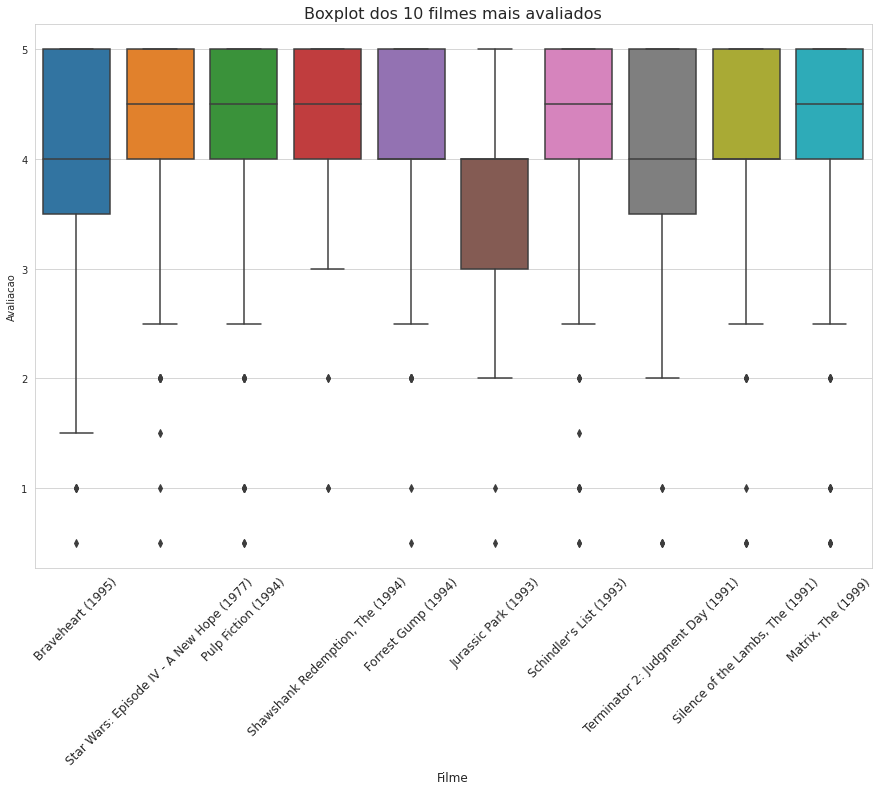

In [18]:
#@title Comparando os valores ilustrados no gráfico abaixo, pode-se dizer que o filme com a melhor nota mínima dentro os mais avaliados é 'Shawshank Redemption, The (1994)'.<br>Confirmando a análise do gráfico acima.
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=df_notas.query(f"filmeId in {list(df_mais_votados['filmeId'])}"),
                 x ="filmeId",
                 y="Avaliacao")
ax.set_xlabel('Filme', fontdict={'fontsize':12})
ax.set_title('Boxplot dos 10 filmes mais avaliados', fontdict={'fontsize':16})
ax.set_xticklabels(df_mais_votados.sort_values('filmeId')['Titulo'], rotation = 45, fontdict={'fontsize':12})
plt.show()

### Desafio 4: [Guilherme Silveira](https://twitter.com/guilhermecaelum)
Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

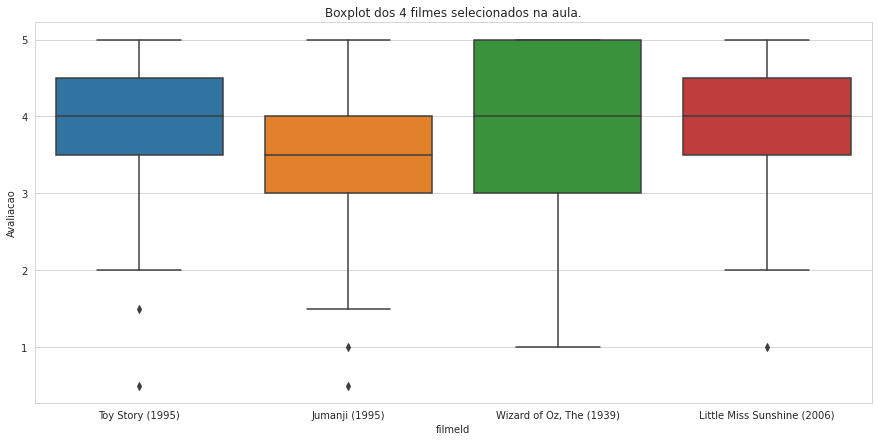

In [19]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(data = df_notas.query("filmeId in [1,2,919,46578]"), x ="filmeId", y="Avaliacao")
ax.set_xticklabels(df_filmes.query("filmeId in [1,2,919,46578]")['Titulo'])
ax.set_title('Boxplot dos 4 filmes selecionados na aula.')
plt.show()

### Desafio 5: [Allan Spadini](https://twitter.com/allanspadini)
Calcular moda, média e mediana. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [20]:
#@title Retira amostras com 100, 50 e 10 avaliações e calcula os valores solicitados

lst_100 = df_filmes_notas_media[df_filmes_notas_media['Qtd_avaliacoes'] == 100].sort_values('AvaliacaoMedia')

idSample5 = lst_100[lst_100['AvaliacaoMedia']==max(lst_100['AvaliacaoMedia'])].values
media = df_notas.query(f'filmeId == {idSample5[0][0]}')['Avaliacao'].mean()
grp_notas = df_notas[df_notas['filmeId'] == idSample5[0][0]].groupby('Avaliacao').count()
moda = grp_notas[grp_notas['filmeId']==grp_notas.values.max()].index
lst_notas = list(df_notas.query(f'filmeId == {idSample5[0][0]}')['Avaliacao'].sort_values())
mediana = (lst_notas[int((len(lst_notas)/2))-1] + lst_notas[int(len(lst_notas)/2)])/2
print('\n{}\n{}\nModa das avaliações = {}\nMédia das avaliações = {}\nMediana da avaliações = {}'.format(*idSample5[0][1:-2], moda[0], media, mediana), sep='\n')

lst_50 = df_filmes_notas_media[df_filmes_notas_media['Qtd_avaliacoes'] == 50].sort_values('AvaliacaoMedia')

idSample3 = lst_50[lst_50['AvaliacaoMedia']==lst_50['AvaliacaoMedia'].min()].values
media = df_notas.query(f'filmeId == {idSample3[0][0]}')['Avaliacao'].mean()
grp_notas = df_notas[df_notas['filmeId'] == idSample3[0][0]].groupby('Avaliacao').count()
moda = grp_notas[grp_notas['filmeId']==grp_notas.values.max()].index
lst_notas = list(df_notas.query(f'filmeId == {idSample3[0][0]}')['Avaliacao'].sort_values())
mediana = (lst_notas[int((len(lst_notas)/2))-1] + lst_notas[int(len(lst_notas)/2)])/2
print('\n{}\n{}\nModa das avaliações = {}\nMédia das avaliações = {}\nMediana da avaliações = {}'.format(*idSample3[0][1:-2], moda[0], media, mediana), sep='\n')

lst_10 = df_filmes_notas_media[df_filmes_notas_media['Qtd_avaliacoes'] == 10].sort_values('AvaliacaoMedia')

idSample = lst_10[lst_10['AvaliacaoMedia']==min(lst_10['AvaliacaoMedia'])].values
media = df_notas.query(f'filmeId == {idSample[0][0]}')['Avaliacao'].mean()
grp_notas = df_notas[df_notas['filmeId'] == idSample[0][0]].groupby('Avaliacao').count()
moda = grp_notas[grp_notas['filmeId']==grp_notas.values.max()].index
lst_notas = list(df_notas.query(f'filmeId == {idSample[0][0]}')['Avaliacao'].sort_values())
mediana = (lst_notas[int((len(lst_notas)/2))-1] + lst_notas[int(len(lst_notas)/2)])/2
print('\n{}\n{}\nModa das avaliações = {}\nMédia das avaliações = {}\nMediana da avaliações = {}'.format(*idSample[0][1:-2], moda[0], media, mediana), sep='\n')


Casablanca (1942)
Drama|Romance
Moda das avaliações = 5.0
Média das avaliações = 4.24
Mediana da avaliações = 4.5

Scary Movie (2000)
Comedy|Horror
Moda das avaliações = 2.0
Média das avaliações = 2.92
Mediana da avaliações = 3.0

Spice World (1997)
Comedy
Moda das avaliações = 0.5
Média das avaliações = 1.35
Mediana da avaliações = 1.0


### Desafio 6: [Thais André](https://twitter.com/thais_tandre)
Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

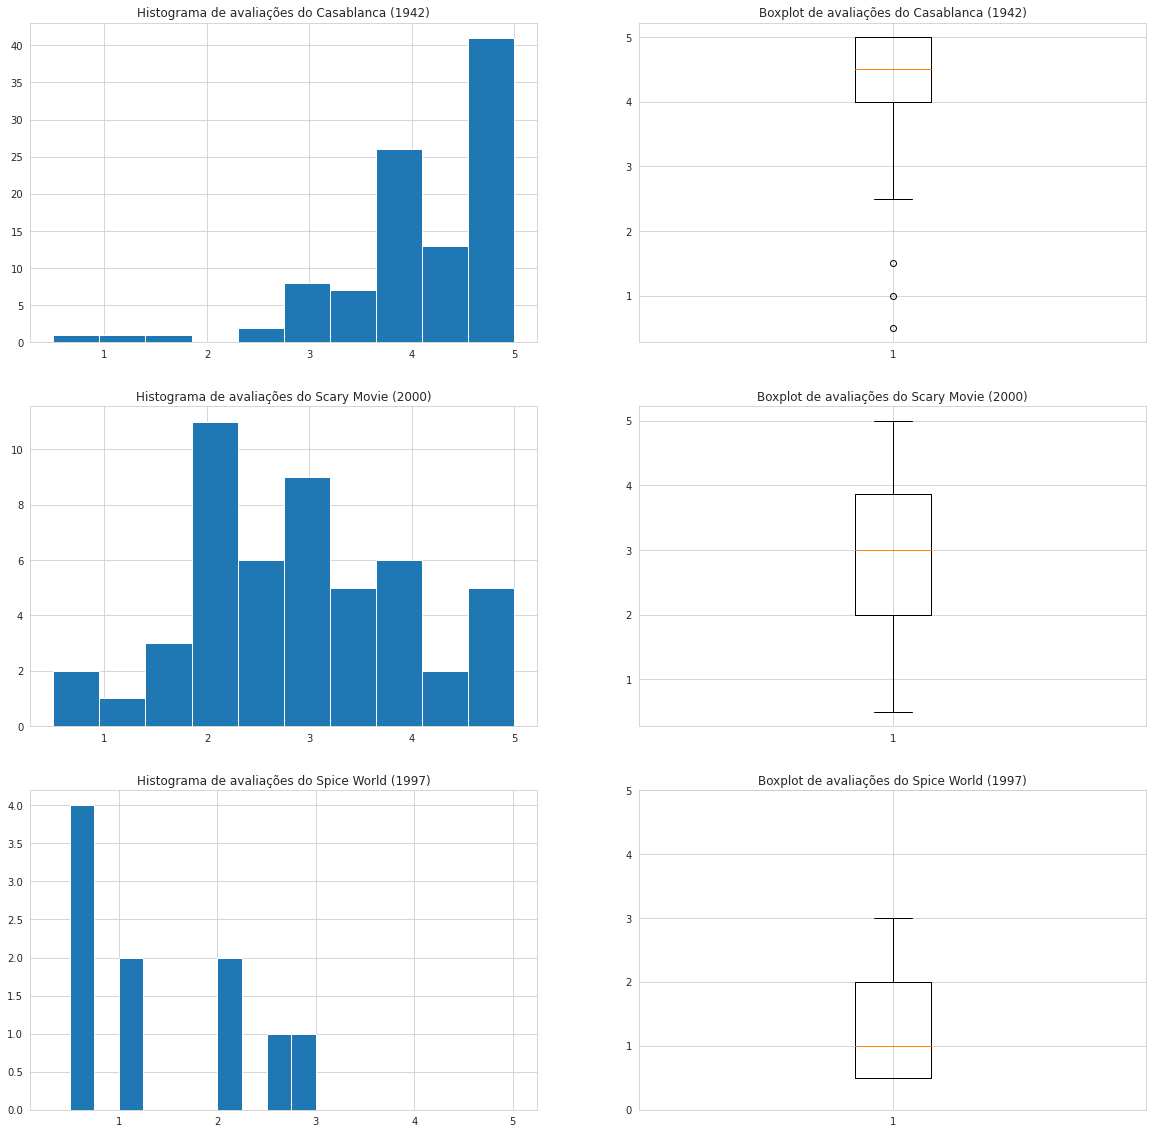

In [21]:
#@title Plota os histogramas e boxplots das avaliações dos filmes acima.
fig, axs = plt.subplots(3,2)
fig.set_figheight(20)
fig.set_figwidth(20)

axs[0,0].hist(df_notas.query(f'filmeId=={idSample5[0][0]}')['Avaliacao'])
axs[0,0].set_title('Histograma de avaliações do {}'.format(idSample5[0][1]))

axs[0,1].boxplot(df_notas.query(f'filmeId=={idSample5[0][0]}')['Avaliacao'])
axs[0,1].set_title('Boxplot de avaliações do {}'.format(idSample5[0][1]))

axs[1,0].hist(df_notas.query(f'filmeId=={idSample3[0][0]}')['Avaliacao'])
axs[1,0].set_title('Histograma de avaliações do {}'.format(idSample3[0][1]))

axs[1,1].boxplot(df_notas.query(f'filmeId=={idSample3[0][0]}')['Avaliacao'])
axs[1,1].set_title('Boxplot de avaliações do {}'.format(idSample3[0][1]))

axs[2,0].hist(df_notas.query(f'filmeId=={idSample[0][0]}')['Avaliacao'])
axs[2,0].set_title('Histograma de avaliações do {}'.format(idSample[0][1]))
axs[2,0].set_xlim(0.1,5.25)

axs[2,1].boxplot(df_notas.query(f'filmeId=={idSample[0][0]}')['Avaliacao'])
axs[2,1].set_title('Boxplot de avaliações do {}'.format(idSample[0][1]))
axs[2,1].set_ylim(0,5)

plt.show()

## Desafio 7: [Thiago Gonçalves](https://twitter.com/tgcsantos)
Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [0]:
df_ano_lancamento = pd.DataFrame(columns=['filmeId', 'Ano'])
for row, ano in df_filmes.iterrows():
  df_ano_lancamento.loc[row, 'filmeId'] = ano['filmeId']
  try:
    df_ano_lancamento.loc[row, 'Ano'] = ano['Titulo'].replace(' ','')[-5:-1]
  except:
    pass

In [28]:
round(df_ano_lancamento.groupby('Ano').mean(),2)

,Avaliacao
Ano,
1902,3.50
1903,2.50
1908,4.00
1915,2.00
1916,3.60
...,...
2014,3.51
2015,3.41
2016,3.39


In [24]:
df_ano_lancamento[df_ano_lancamento['Ano'].isna()]

,filmeId,Ano,Avaliacao
81309,40697,NaN,4.0
81310,40697,NaN,0.5
99343,140956,NaN,3.5
99344,140956,NaN,4.5
99345,140956,NaN,3.0
99346,140956,NaN,3.0
99477,143410,NaN,2.0
99544,147250,NaN,5.0
99635,149334,NaN,3.0
99817,156605,NaN,4.5
